# Шаг 3. Визуализация и создание новых признаков

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from sklearn.impute import SimpleImputer
import random

import warnings

warnings.filterwarnings("ignore")

In [2]:
IMOEX = pd.read_csv('IMOEX')
MOEXMM = pd.read_csv('MOEXMM')
GOLD_df = pd.read_csv('GOLD_df')
USDRUB_df = pd.read_csv('USDRUB_df')
INFLATION = pd.read_csv('INFLATION')
RESULT_df = pd.read_csv('RESULT_df')

In [3]:
IMOEX['TRADEDATE'] = pd.to_datetime(IMOEX['TRADEDATE'])
MOEXMM['TRADEDATE'] = pd.to_datetime(MOEXMM['TRADEDATE'])
INFLATION['TRADEDATE'] = pd.to_datetime(INFLATION['TRADEDATE'])
USDRUB_df['TRADEDATE'] = pd.to_datetime(USDRUB_df['TRADEDATE'])
GOLD_df['TRADEDATE'] = pd.to_datetime(GOLD_df['TRADEDATE'])
RESULT_df['TRADEDATE'] = pd.to_datetime(RESULT_df['TRADEDATE'])

### Поиск корелляции между ценой золота и индексами

Смотреть по цене открытия или закрытия индексов не будет корректным, потому что волатильность в течение дня индекса может быть существенной, поэтому введем новый признак: среднее значение между ценой открытия и закрытия

In [4]:
RESULT_df['AVER_IMOEX'] = (RESULT_df['OPEN_IMOEX'] + RESULT_df['CLOSE_IMOEX'])/2
RESULT_df['AVER_MOEXMM'] = (RESULT_df['OPEN_MOEXMM'] + RESULT_df['CLOSE_MOEXMM'])/2
RESULT_df.set_index('TRADEDATE', inplace=True)
print(RESULT_df.head(10))

            CLOSE_IMOEX  OPEN_IMOEX  HIGH_IMOEX  LOW_IMOEX   VALUE_IMOEX  \
TRADEDATE                                                                  
2013-09-02      1367.53     1364.75    1373.730   1364.270  1.274407e+10   
2013-09-03      1373.82     1366.99    1384.180   1366.990  2.216425e+10   
2013-09-04      1375.66     1372.98    1376.420   1365.210  1.692969e+10   
2013-09-05      1422.40     1375.66    1422.400   1373.290  3.763559e+10   
2013-09-06      1423.40     1421.86    1448.750   1418.800  5.218912e+10   
2013-09-07      1437.47     1422.63    1452.015   1420.125  4.899117e+10   
2013-09-09      1451.54     1423.40    1455.280   1421.450  4.579322e+10   
2013-09-10      1453.57     1451.54    1464.200   1446.970  4.892904e+10   
2013-09-11      1454.12     1452.52    1459.680   1449.580  3.068467e+10   
2013-09-12      1450.23     1454.21    1461.200   1441.580  3.273912e+10   

            CAPITALIZATION_IMOEX  CLOSE_MOEXMM  OPEN_MOEXMM  HIGH_MOEXMM  \
TRADEDATE  

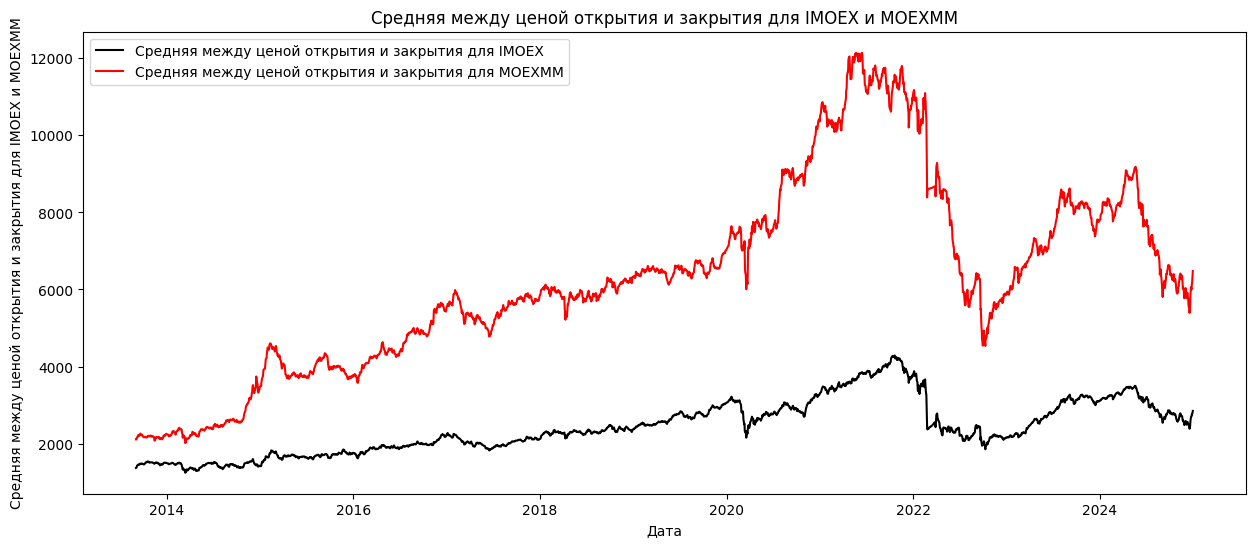

In [50]:
plt.figure(figsize=(15, 6))
plt.plot(RESULT_df.index, RESULT_df['AVER_IMOEX'], label='Средняя между ценой открытия и закрытия для IMOEX', color='black')
plt.plot(RESULT_df.index, RESULT_df['AVER_MOEXMM'], label='Средняя между ценой открытия и закрытия для MOEXMM', color='red')
plt.title('Средняя между ценой открытия и закрытия для IMOEX и MOEXMM')
plt.xlabel('Дата')
plt.ylabel('Средняя между ценой открытия и закрытия для IMOEX и MOEXMM')
plt.legend()
plt.show()

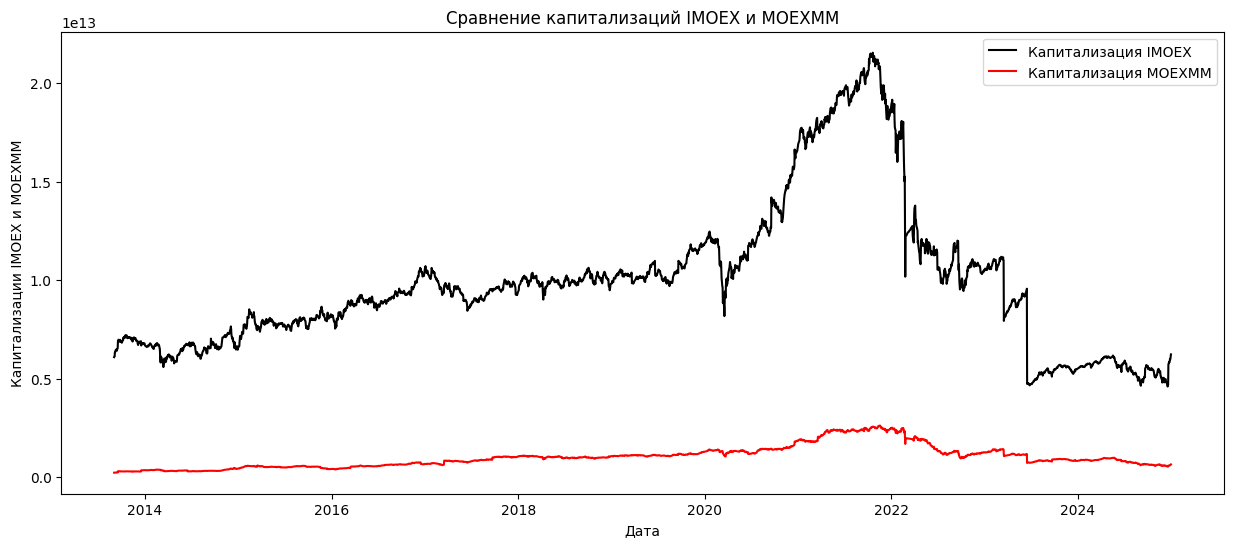

In [49]:
plt.figure(figsize=(15, 6))
plt.plot(RESULT_df.index, RESULT_df['CAPITALIZATION_IMOEX'], label='Капитализация IMOEX', color='black')
plt.plot(RESULT_df.index, RESULT_df['CAPITALIZATION_MOEXMM'], label='Капитализация MOEXMM', color='red')
plt.title('Сравнение капитализаций IMOEX и MOEXMM')
plt.xlabel('Дата')
plt.ylabel('Капитализации IMOEX и MOEXMM')
plt.legend()
plt.show()

Заметим, что между ценами открытия индексов и капитализацией есть значительная корелляция, поэтому далее логичнее посмотреть какой из индексов сильнее кореллирует с золотом и брать только его во избежание зависимых величин

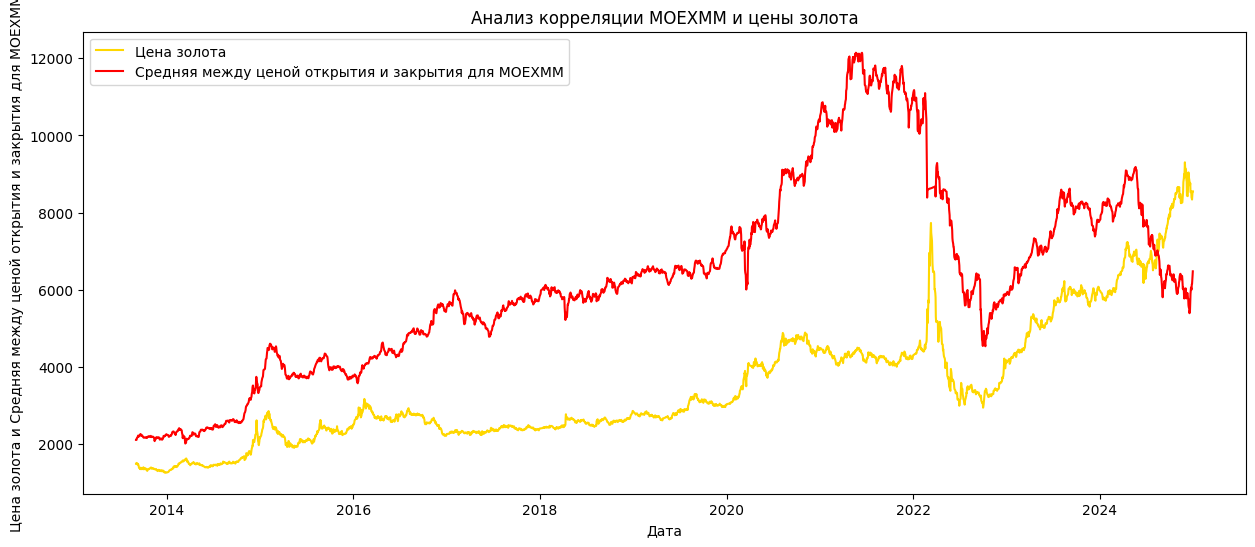

In [48]:
plt.figure(figsize=(15, 6))
plt.plot(RESULT_df.index, RESULT_df['Price_GOLD'], label='Цена золота', color='gold')
plt.plot(RESULT_df.index, RESULT_df['AVER_MOEXMM'], label='Средняя между ценой открытия и закрытия для MOEXMM', color='red')
plt.title('Анализ корреляции MOEXMM и цены золота')
plt.xlabel('Дата')
plt.ylabel('Цена золота и Средняя между ценой открытия и закрытия для MOEXMM')
plt.legend()
plt.show()

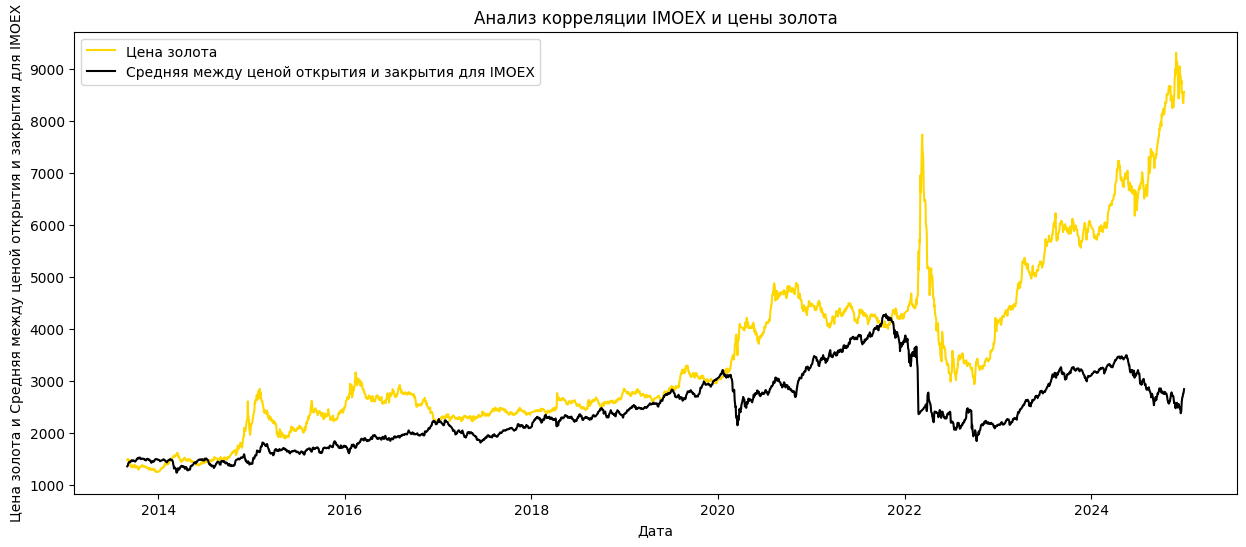

In [47]:
plt.figure(figsize=(15, 6))
plt.plot(RESULT_df.index, RESULT_df['Price_GOLD'], label='Цена золота', color='gold')
plt.plot(RESULT_df.index, RESULT_df['AVER_IMOEX'], label='Средняя между ценой открытия и закрытия для IMOEX', color='black')
plt.title('Анализ корреляции IMOEX и цены золота')
plt.xlabel('Дата')
plt.ylabel('Цена золота и Средняя между ценой открытия и закрытия для IMOEX')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Корреляция цены индекса MOEXMM и ценой золота')

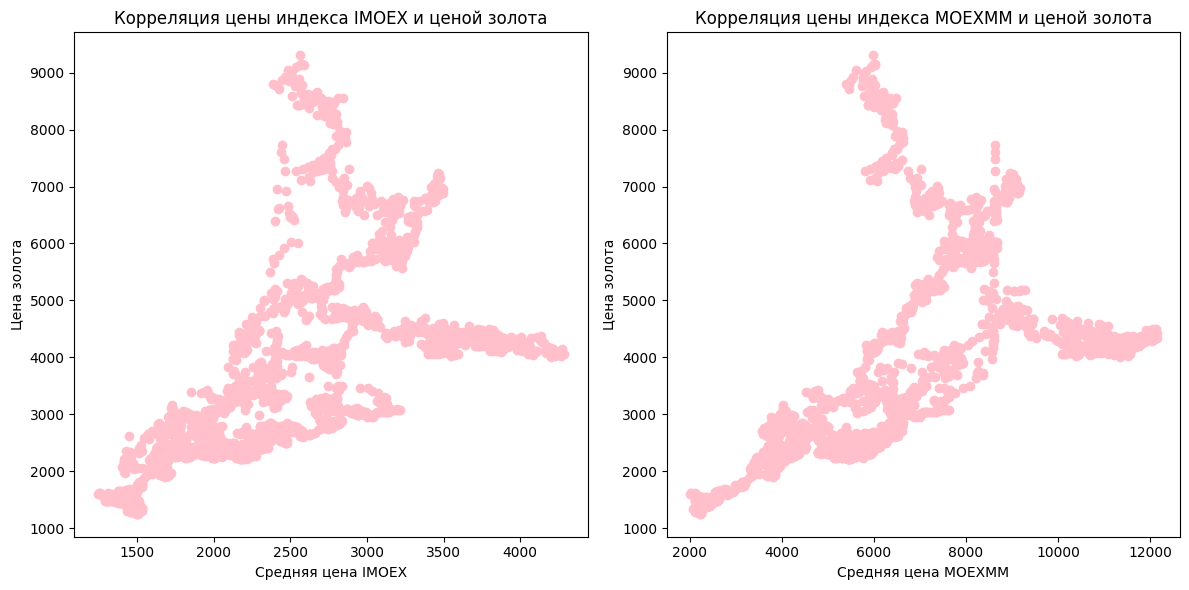

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)

ax[0].scatter(RESULT_df['AVER_IMOEX'], RESULT_df['Price_GOLD'], color = 'pink')
ax[0].set_xlabel('Средняя цена IMOEX')
ax[0].set_ylabel('Цена золота')
ax[0].set_title("Корреляция цены индекса IMOEX и ценой золота")

ax[1].scatter(RESULT_df['AVER_MOEXMM'], RESULT_df['Price_GOLD'], color = 'pink')
ax[1].set_xlabel('Средняя цена MOEXMM')
ax[1].set_ylabel('Цена золота')
ax[1].set_title("Корреляция цены индекса MOEXMM и ценой золота")

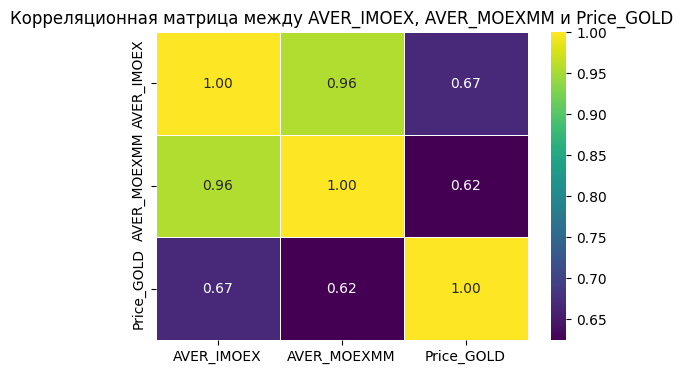

In [53]:
heatmap_data = RESULT_df[['AVER_IMOEX', 'AVER_MOEXMM', 'Price_GOLD']]
correlation_matrix = heatmap_data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.4)
plt.title("Корреляционная матрица между AVER_IMOEX, AVER_MOEXMM и Price_GOLD")
plt.show()

Цена золота и цены индексов IMOEX и MOEXMM имеют умеренную корреляцию (0.40 - 0.69), то есть связь между переменными заметная. Однако индекс IMOEX имеет более выраженную корреляцию с ценой золота, поэтому в качестве индекса для модели машинного обучения выберем его.